The MNIST (Modified National Institute of Standards and Technology) dataset consists of images of handwritten digits that is used for training and testing image processing systems

This is a multiclass classification problem in which the goal is to predict a single discrete label (0,1,2,3,4,5,6,7,8,9)

In [1]:
from tensorflow.keras.datasets import mnist # mnist dataset
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

Loading MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.ndim

3

In [5]:
train_images.dtype

dtype('uint8')

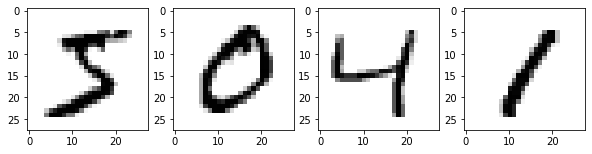

In [6]:
plt.figure(figsize=(10,10))
x, y = 4, 1
for i in range(4):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [7]:
train_labels[:4]

array([5, 0, 4, 1], dtype=uint8)

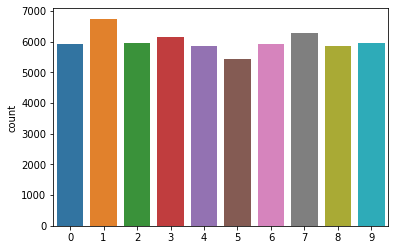

In [8]:
sns.countplot(train_labels)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_images.ndim

3

In [11]:
test_images.dtype

dtype('uint8')

Linear model definition

The output of the network is a layer of size 10 with a probability distribution over the 10 different classes

In [12]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Compiling the model

The chosen loss function is categorical_crossentropy because is a multiclass classification problem

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Encoding the data

In [14]:
train_images_prepared = train_images.reshape((60000, 28 * 28))
train_images_prepared = train_images_prepared.astype('float32') / 255

test_images_prepared = test_images.reshape((10000, 28 * 28))
test_images_prepared = test_images_prepared.astype('float32') / 255

In [15]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Setting a validation set of 6000 samples from 60000 training images

In [16]:
train_images_val = train_images_prepared[:6000]
train_images_partial = train_images_prepared[6000:]

train_labels_val = train_labels_one_hot[:6000]
train_labels_partial = train_labels_one_hot[6000:]

Training the model for 10 epochs or passes over the entire dataset

In [17]:
history = model.fit(train_images_partial, train_labels_partial, epochs=10, batch_size=128, validation_data=(train_images_val, train_labels_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 77us/sample - loss: 0.2715 - accuracy: 0.9221 - val_loss: 0.1365 - val_accuracy: 0.9608
Epoch 2/10
54000/54000 [==============================] - 3s 64us/sample - loss: 0.1110 - accuracy: 0.9673 - val_loss: 0.0915 - val_accuracy: 0.9707
Epoch 3/10
54000/54000 [==============================] - 3s 63us/sample - loss: 0.0725 - accuracy: 0.9784 - val_loss: 0.0759 - val_accuracy: 0.9763
Epoch 4/10
54000/54000 [==============================] - 3s 63us/sample - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.0793 - val_accuracy: 0.9760
Epoch 5/10
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0683 - val_accuracy: 0.9807
Epoch 6/10
54000/54000 [==============================] - 3s 60us/sample - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0676 - val_accuracy: 0.9782
Epoch 7/10
54000/54000 [==============================] -

Plotting training and validation loss

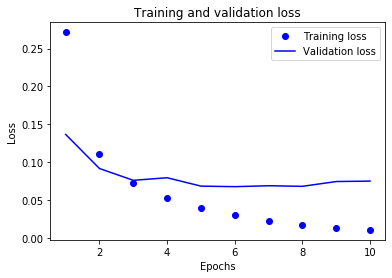

In [18]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting training and validation accuracy

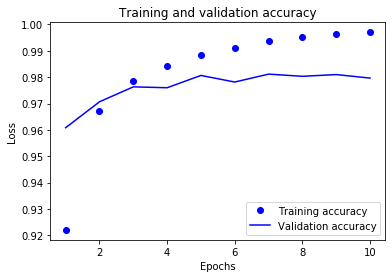

In [19]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfit begins after 5 epochs

Retraining the model from scratch for 5 epochs to avoid overfit. Note that validation set is not used for this time

In [20]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images_prepared, train_labels_one_hot, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2552 - accuracy: 0.9272
Epoch 2/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1053 - accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0677 - accuracy: 0.9801
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0495 - accuracy: 0.9854
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0371 - accuracy: 0.9890


Model evaluation

In [21]:
final_loss, final_acc = model.evaluate(test_images_prepared, test_labels_one_hot)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Final results

In [22]:
print('Final loss: {0}'.format(final_loss))
print('Final accuracy: {0}'.format(final_acc))

Final loss: 0.06748222337067127
Final accuracy: 0.98089998960495


Generating predictions for two samples of numbers 4 and 9 from test images

First sample is a number 4 from test images

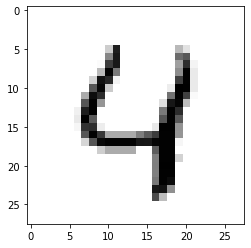

In [23]:
digit = test_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [24]:
test_labels[4]

4

In [25]:
prediction = model.predict(test_images_prepared[4:5], batch_size=784)
print(prediction)

[[2.7624961e-07 1.6413294e-11 1.6255866e-07 2.3211466e-09 9.9987233e-01
  7.4211592e-08 9.4341988e-07 1.6008837e-05 5.3066913e-07 1.0976737e-04]]


The highest likelihood is above 0.99 for number 4

Now it is time to predict a number 9 from test images

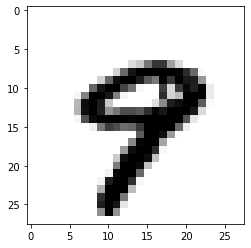

In [26]:
digit = test_images[9]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [27]:
test_labels[9]

9

In [28]:
prediction = model.predict(test_images_prepared[9:10], batch_size=784)
print(prediction)

[[1.5195508e-11 1.3855354e-13 3.2045816e-10 2.8116068e-07 2.4850613e-03
  1.8881590e-08 7.1349081e-12 2.7852145e-04 9.5316020e-05 9.9714077e-01]]


The highest likelihood is above 0.99 for number 9